Винников Степан
ИУ5-62Б
ЛР№2

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [48]:
data = pd.read_csv('boston_crime.csv', encoding='windows-1252')

In [49]:
# размер набора данных
data.shape

(260503, 17)

In [50]:
# проверим есть ли пропущенные значения
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1412
REPORTING_AREA              0
SHOOTING               259650
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   79
STREET                  10072
Lat                     15918
Long                    15918
Location                    0
dtype: int64

In [51]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182009324,3115,Investigate Person,INVESTIGATE PERSON,B2,321,NaN,2018-02-04 20:32:00,2018,2,Sunday,20,Part Three,BLUE HILL AVE,42.309525,-71.082618,"(42.30952511, -71.08261838)"
1,I182009319,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,354,NaN,2018-02-04 21:31:00,2018,2,Sunday,21,Part Two,ADAMS ST,42.298077,-71.056952,"(42.29807739, -71.05695195)"
2,I182009313,1402,Vandalism,VANDALISM,C6,914,NaN,2018-02-04 20:44:00,2018,2,Sunday,20,Part Two,OLD COLONY AVE,42.324226,-71.052426,"(42.32422562, -71.05242608)"
3,I182009311,3410,Towed,TOWED MOTOR VEHICLE,C11,247,NaN,2018-02-04 16:40:00,2018,2,Sunday,16,Part Three,PEARL ST,42.314935,-71.058349,"(42.31493506, -71.05834852)"
4,I182009309,3114,Investigate Property,INVESTIGATE PROPERTY,E13,638,NaN,2018-02-04 20:51:16,2018,2,Sunday,20,Part Three,DANFORTH ST,42.317552,-71.105345,"(42.31755171, -71.10534530)"


In [52]:
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [53]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 260503


In [54]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Lat. Тип данных float64. Количество пустых значений 15918, 6.11%.
Колонка Long. Тип данных float64. Количество пустых значений 15918, 6.11%.


In [55]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка DISTRICT. Тип данных object. Количество пустых значений 1412, 0.54%.
Колонка SHOOTING. Тип данных object. Количество пустых значений 259650, 99.67%.
Колонка UCR_PART. Тип данных object. Количество пустых значений 79, 0.03%.
Колонка STREET. Тип данных object. Количество пустых значений 10072, 3.87%.


In [56]:
data_num = data[num_cols]
data_num

,Lat,Long
0,42.309525,-71.082618
1,42.298077,-71.056952
2,42.324226,-71.052426
3,42.314935,-71.058349
4,42.317552,-71.105345
...,...,...
260498,42.336951,-71.085748
260499,42.255926,-71.123172
260500,42.255926,-71.123172
260501,42.302333,-71.111565


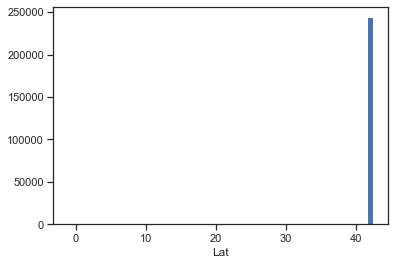

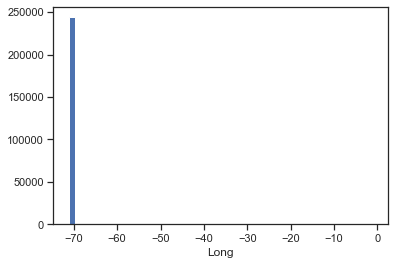

In [57]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [58]:
data_num_Lat = data_num[['Lat']]
data_num_Lat.head()

,Lat
0,42.309525
1,42.298077
2,42.324226
3,42.314935
4,42.317552


In [59]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Lat)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [60]:
strategies=['mean']

In [61]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Lat)
    return data_num_imp[mask_missing_values_only]

In [62]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([42.22622038, 42.22622038, 42.22622038, ..., 42.22622038,
        42.22622038, 42.22622038]))

In [63]:
data_num_Long = data_num[['Long']]
data_num_Long.head()

,Long
0,-71.082618
1,-71.056952
2,-71.052426
3,-71.058349
4,-71.105345


In [64]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Long)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [65]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Long)
    return data_num_imp[mask_missing_values_only]

In [66]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([-70.92721537, -70.92721537, -70.92721537, ..., -70.92721537,
        -70.92721537, -70.92721537]))

In [67]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1412
REPORTING_AREA              0
SHOOTING               259650
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   79
STREET                  10072
Lat                     15918
Long                    15918
Location                    0
dtype: int64

In [68]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка DISTRICT. Тип данных object. Количество пустых значений 1412, 0.54%.
Колонка SHOOTING. Тип данных object. Количество пустых значений 259650, 99.67%.
Колонка UCR_PART. Тип данных object. Количество пустых значений 79, 0.03%.
Колонка STREET. Тип данных object. Количество пустых значений 10072, 3.87%.


In [69]:
cat_temp_data = data[['DISTRICT']]
cat_temp_data.head()

,DISTRICT
0,B2
1,C11
2,C6
3,C11
4,E13


In [70]:
cat_temp_data['DISTRICT'].unique()

array(['B2', 'C11', 'C6', 'E13', 'B3', 'A7', 'A1', 'E18', nan, 'D4',
       'D14', 'E5', 'A15'], dtype=object)

In [71]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['B2'],
       ['C11'],
       ['C6'],
       ...,
       ['E18'],
       ['E13'],
       ['D4']], dtype=object)

In [72]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13',
       'E18', 'E5'], dtype=object)

In [73]:
cat_temp_data1 = data[['UCR_PART']]
cat_temp_data1.head()

,UCR_PART
0,Part Three
1,Part Two
2,Part Two
3,Part Three
4,Part Three


In [74]:
cat_temp_data1['UCR_PART'].unique()

array(['Part Three', 'Part Two', 'Part One', 'Other', nan], dtype=object)

In [75]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data1)
data_imp4

array([['Part Three'],
       ['Part Two'],
       ['Part Two'],
       ...,
       ['Part Three'],
       ['Part Three'],
       ['Part Three']], dtype=object)

In [76]:
np.unique(data_imp4)

array(['Other', 'Part One', 'Part Three', 'Part Two'], dtype=object)

In [77]:
cat_temp_data2 = data[['STREET']]
cat_temp_data2.head()

,STREET
0,BLUE HILL AVE
1,ADAMS ST
2,OLD COLONY AVE
3,PEARL ST
4,DANFORTH ST


In [78]:
cat_temp_data2['STREET'].unique()

array(['BLUE HILL AVE', 'ADAMS ST', 'OLD COLONY AVE', ..., 'BAGNAL ST',
       'MT PLEASANT AVE', 'SAVIN HILL AV'], dtype=object)

In [79]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data2)
data_imp3

array([['BLUE HILL AVE'],
       ['ADAMS ST'],
       ['OLD COLONY AVE'],
       ...,
       ['RIVER ST'],
       ['NEW WASHINGTON ST'],
       ['WASHINGTON ST']], dtype=object)

In [80]:
np.unique(data_imp3)

array([' ALBANY ST ', ' COLUMBUS AVE ', ' COMMONWEALTH AVE ', ...,
       'ZEIGLER', 'ZEIGLER ST', 'ZELLER ST'], dtype=object)

In [81]:
cat_temp_data = data[['STREET']]
cat_temp_data.head()

,STREET
0,BLUE HILL AVE
1,ADAMS ST
2,OLD COLONY AVE
3,PEARL ST
4,DANFORTH ST


In [82]:
cat_temp_data['STREET'].unique()

array(['BLUE HILL AVE', 'ADAMS ST', 'OLD COLONY AVE', ..., 'BAGNAL ST',
       'MT PLEASANT AVE', 'SAVIN HILL AV'], dtype=object)

In [83]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182009324,3115,Investigate Person,INVESTIGATE PERSON,B2,321,NaN,2018-02-04 20:32:00,2018,2,Sunday,20,Part Three,BLUE HILL AVE,42.309525,-71.082618,"(42.30952511, -71.08261838)"
1,I182009319,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,354,NaN,2018-02-04 21:31:00,2018,2,Sunday,21,Part Two,ADAMS ST,42.298077,-71.056952,"(42.29807739, -71.05695195)"
2,I182009313,1402,Vandalism,VANDALISM,C6,914,NaN,2018-02-04 20:44:00,2018,2,Sunday,20,Part Two,OLD COLONY AVE,42.324226,-71.052426,"(42.32422562, -71.05242608)"
3,I182009311,3410,Towed,TOWED MOTOR VEHICLE,C11,247,NaN,2018-02-04 16:40:00,2018,2,Sunday,16,Part Three,PEARL ST,42.314935,-71.058349,"(42.31493506, -71.05834852)"
4,I182009309,3114,Investigate Property,INVESTIGATE PROPERTY,E13,638,NaN,2018-02-04 20:51:16,2018,2,Sunday,20,Part Three,DANFORTH ST,42.317552,-71.105345,"(42.31755171, -71.10534530)"


In [84]:
cat_enc = pd.DataFrame({'DISTRICT':data_imp2.T[0]})
cat_enc

,DISTRICT
0,B2
1,C11
2,C6
3,C11
4,E13
...,...
260498,D4
260499,E18
260500,E18
260501,E13


In [85]:
cat_enc['DISTRICT'].unique()

array(['B2', 'C11', 'C6', 'E13', 'B3', 'A7', 'A1', 'E18', 'D4', 'D14',
       'E5', 'A15'], dtype=object)

In [86]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['DISTRICT'])

In [87]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13',
       'E18', 'E5'], dtype=object)

In [88]:
cat_enc_le

array([ 3,  5,  6, ..., 10,  9,  8])

In [89]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

array(['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13',
       'E18', 'E5'], dtype=object)

In [91]:
data_oe = data[['UCR_PART', 'STREET']]
data_oe.head()

,UCR_PART,STREET
0,Part Three,BLUE HILL AVE
1,Part Two,ADAMS ST
2,Part Two,OLD COLONY AVE
3,Part Three,PEARL ST
4,Part Three,DANFORTH ST


In [92]:
imp5 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp5.fit_transform(data_oe)
data_oe_filled

array([['Part Three', 'BLUE HILL AVE'],
       ['Part Two', 'ADAMS ST'],
       ['Part Two', 'OLD COLONY AVE'],
       ...,
       ['Part Three', 'RIVER ST'],
       ['Part Three', 'NEW WASHINGTON ST'],
       ['Part Three', 'WASHINGTON ST']], dtype=object)

In [93]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[3.000e+00, 4.700e+02],
       [4.000e+00, 5.900e+01],
       [4.000e+00, 3.040e+03],
       ...,
       [3.000e+00, 3.417e+03],
       [3.000e+00, 2.934e+03],
       [3.000e+00, 4.214e+03]])

In [94]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4.])

In [95]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.467e+03, 4.468e+03,
       4.469e+03])

In [96]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['MONTH']])

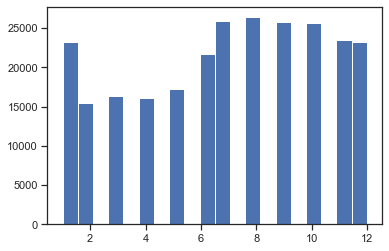

In [97]:
plt.hist(data['MONTH'], 20)
plt.show()

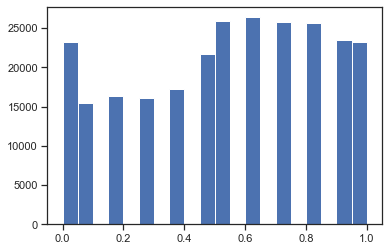

In [98]:
plt.hist(sc1_data, 20)
plt.show()

In [99]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['MONTH']])

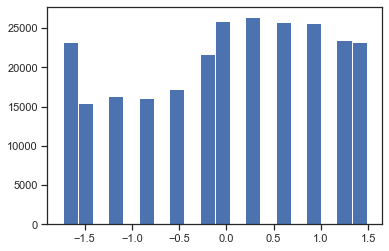

In [100]:
plt.hist(sc2_data, 20)
plt.show()

In [37]:
cat_temp_data['STREET'].unique()

In [38]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [50]:
cat_enc = pd.DataFrame({'DISTRICT':data_imp2.T[0]})
cat_enc

,DISTRICT
0,D14
1,C11
2,D4
3,D4
4,B3
...,...
319068,D4
319069,E18
319070,E18
319071,E13


In [51]:
cat_enc['DISTRICT'].unique()

In [52]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['DISTRICT'])

In [53]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

In [54]:
cat_enc_le

In [55]:
np.unique(cat_enc_le)

In [56]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [57]:
data_oe = data[['UCR_PART', 'STREET']]
data_oe.head()

,UCR_PART,STREET
0,Part One,LINCOLN ST
1,Part Two,HECLA ST
2,Part Three,CAZENOVE ST
3,Part Three,NEWCOMB ST
4,Part Three,DELHI ST


In [58]:
imp5 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp5.fit_transform(data_oe)
data_oe_filled

In [59]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

In [60]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

In [61]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

In [62]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['MONTH']])

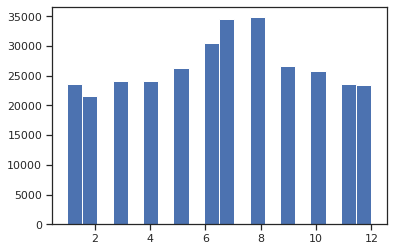

In [63]:
plt.hist(data['MONTH'], 20)
plt.show()

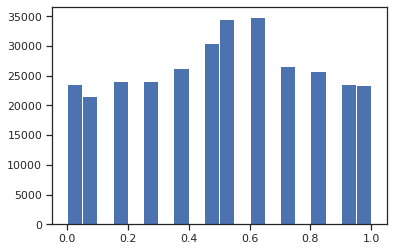

In [64]:
plt.hist(sc1_data, 20)
plt.show()

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['MONTH']])

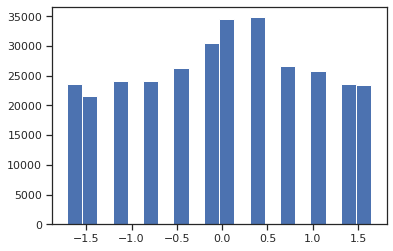

In [66]:
plt.hist(sc2_data, 20)
plt.show()